In [1]:
from qiskit import *

In [2]:
qr = QuantumRegister(2)

In [3]:
cr = ClassicalRegister(2)

In [4]:
circuit = QuantumCircuit(qr, cr)

In [5]:
%matplotlib inline

In [6]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [7]:
circuit.h(qr[0])

In [14]:
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

In [15]:
circuit.cx(qr[0], qr[1])

In [16]:
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [17]:
circuit.measure(qr, cr)

In [18]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

In [19]:
simulator = Aer.get_backend('qasm_simulator')

In [21]:
result = execute(circuit, backend=simulator).result()

In [23]:
from qiskit.tools.visualization import plot_histogram

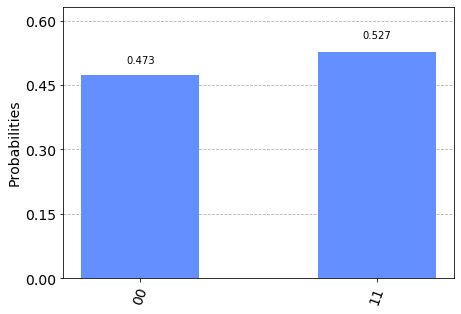

In [24]:
plot_histogram(result.get_counts(circuit))

In [25]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [30]:
provider = IBMQ.get_provider('ibm-q')

In [31]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [32]:
job = execute(circuit, backend=qcomp)

In [34]:
from qiskit.tools.monitor import job_monitor

In [35]:
job_monitor(job)

Job Status: job has successfully run


In [36]:
result = job.result()

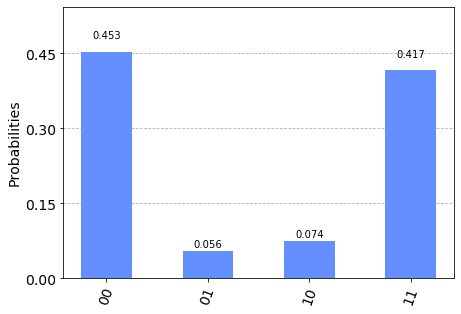

In [37]:
plot_histogram(result.get_counts(circuit))